<h3> Exercises : </h3>
<ol>
   <li> Load the diabetes dataset (available in sklearn.datasets) and use the preprocessing steps to standardize the data and provide intuition the relation of features using various preprocessing modules as per your choice. </li>    
  <li> Apply the KNN classifier on the diabetes dataset with k= 2,3,5,6 and 7 values and evaluate the model based on the dataset's standardized features. </li>
    </ol>
    

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler


diabetes = load_diabetes(scaled=False)

df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

# convert the sex values in the df from [1, 2] to [0, 1]
sex_codes = {1: 0, 2: 1}
df['sex'] = df['sex'].map(sex_codes)

df['target'] = diabetes.target
df['target'] = df['target']

df.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,59.0,1,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0,151.0
1,48.0,0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0,75.0
2,72.0,1,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0,141.0
3,24.0,0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0,206.0
4,50.0,0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0,135.0


In [31]:
!pip install dabl
import dabl

Target looks like regression


c:\Users\Uday Om\AppData\Local\Programs\Python\Python39\lib\site-packages\dabl\plot\supervised.py:214: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medians = X_new.groupby(col)[target_col].median()


[<Axes: title={'center': 'Target distribution'}, xlabel='target', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=5.89E-01'}, xlabel='s5', ylabel='target'>,
         <Axes: title={'center': 'F=5.61E-01'}, xlabel='bmi'>,
         <Axes: title={'center': 'F=4.49E-01'}, xlabel='s4'>],
        [<Axes: title={'center': 'F=4.16E-01'}, xlabel='bp', ylabel='target'>,
         <Axes: title={'center': 'F=-4.10E-01'}, xlabel='s3'>,
         <Axes: title={'center': 'F=3.51E-01'}, xlabel='s6'>],
        [<Axes: title={'center': 'F=2.32E-01'}, xlabel='s1', ylabel='target'>,
         <Axes: title={'center': 'F=1.98E-01'}, xlabel='age'>,
         <Axes: title={'center': 'F=1.96E-01'}, xlabel='s2'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=3.62E-02'}, xlabel='target', ylabel='sex'>]],
       dtype=object)]

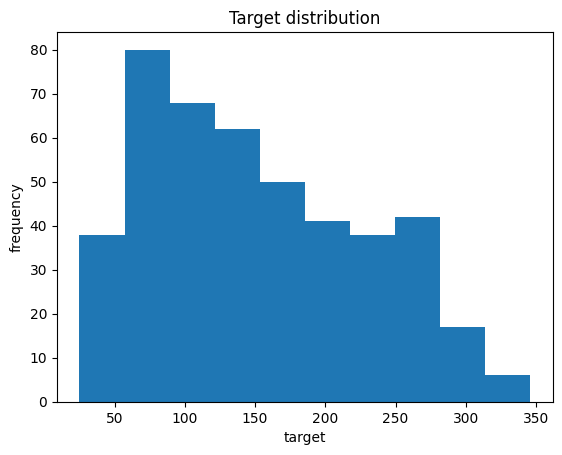

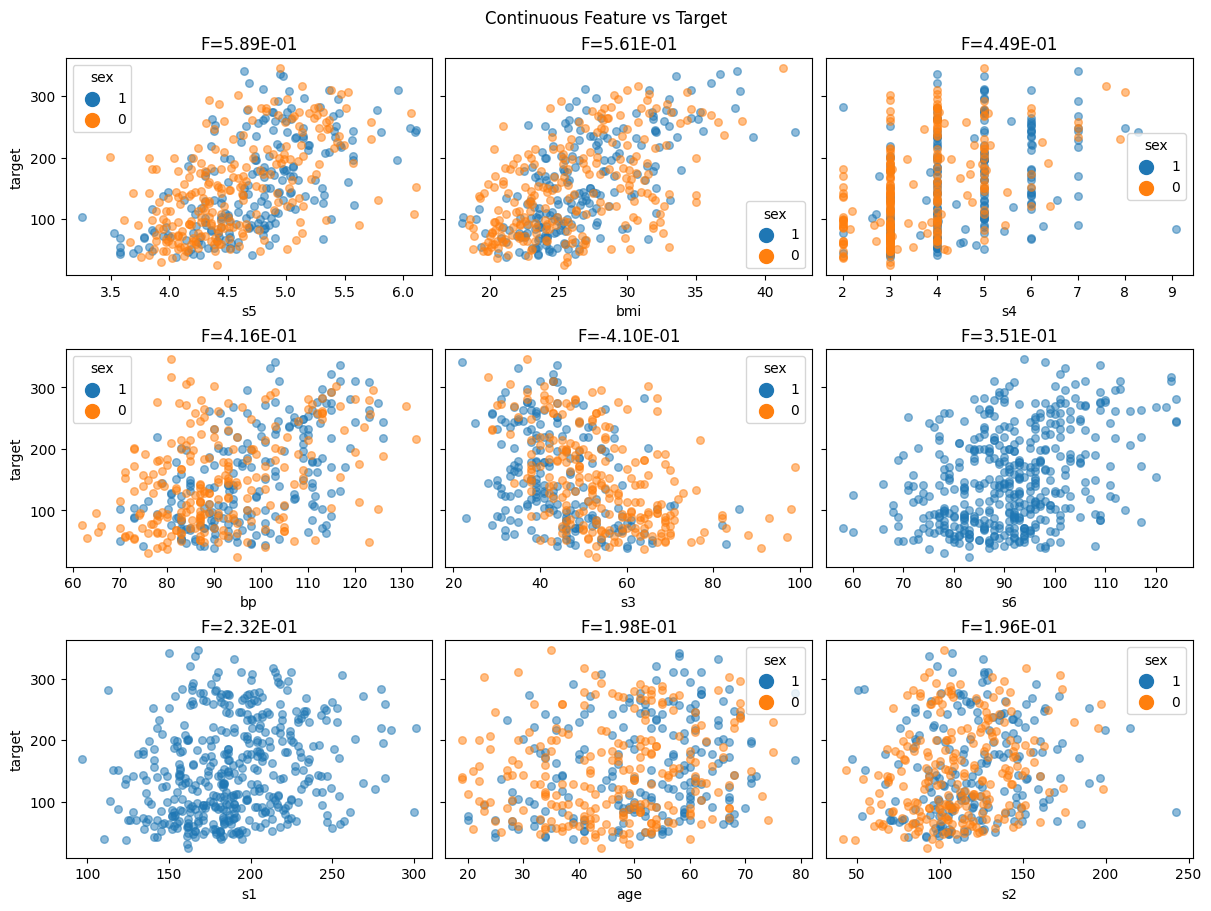

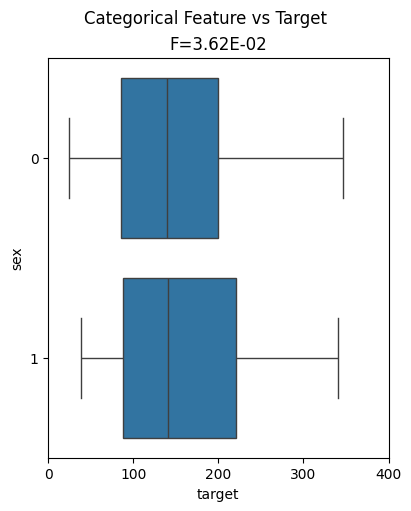

In [32]:
dabl.plot(df, target_col='target')

In [33]:
len(df['target'].unique())

214

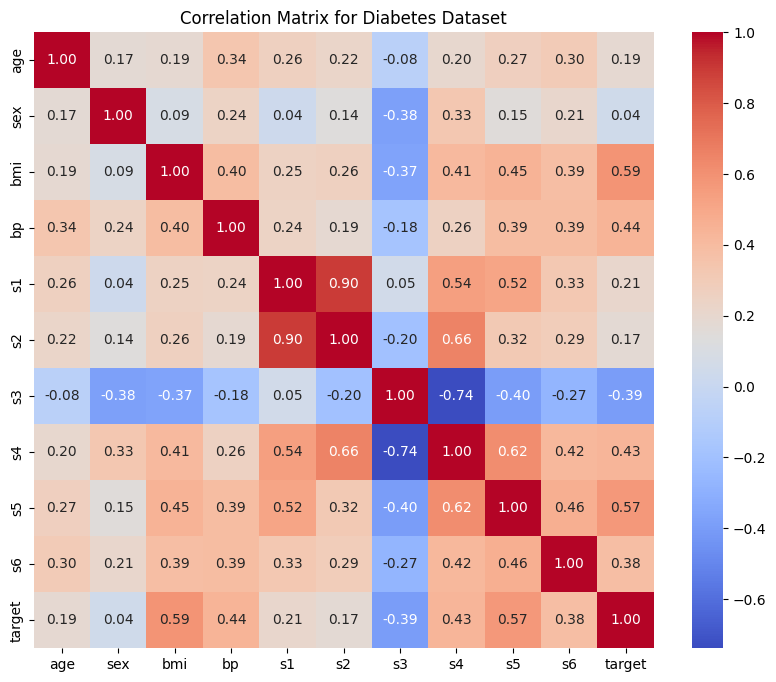

In [34]:
import seaborn as sns

plt.figure(figsize=(10, 8))

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Diabetes Dataset')
plt.show()


In [35]:
scaler = StandardScaler()

X = scaler.fit_transform(df.drop(columns=['target']))

y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

X_train.shape, X_test.shape

((309, 10), (133, 10))

In [36]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

for k in [2, 3, 5, 6, 7]:
    knn = KNeighborsRegressor(n_neighbors=k).fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    mse = (mean_squared_error(y_test, y_pred))**0.5

    print(f"Root Mean Squared Error for k = {k} is: {mse:.2f}")

Root Mean Squared Error for k = 2 is: 57.25
Root Mean Squared Error for k = 3 is: 55.40
Root Mean Squared Error for k = 5 is: 54.72
Root Mean Squared Error for k = 6 is: 54.22
Root Mean Squared Error for k = 7 is: 54.91


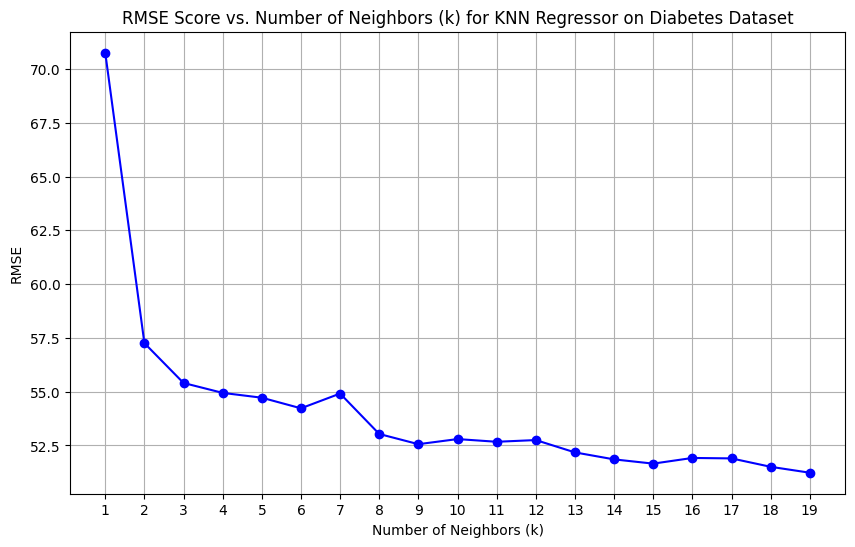

In [37]:
k_values = np.arange(1, 20)  # Test k values from 1 to 20
rmse_values = []

for k in k_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)

    y_pred = knn_regressor.predict(X_test)

    rmse = mean_squared_error(y_test, y_pred)**0.5
    rmse_values.append(rmse)

# Plot RMSE score vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, rmse_values, marker='o', linestyle='-', color='b')
plt.title('RMSE Score vs. Number of Neighbors (k) for KNN Regressor on Diabetes Dataset')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('RMSE')
plt.xticks(k_values)
plt.grid(True)
plt.show()


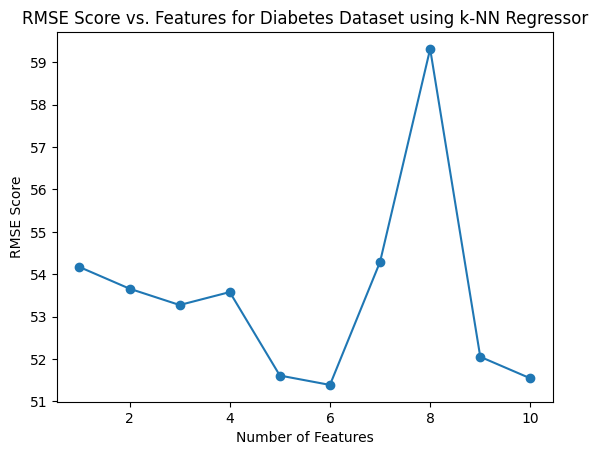

In [39]:
knn = KNeighborsRegressor(n_neighbors=8)

num_features = X.shape[1]
rmse_list = []

for i in range(num_features, 0, -1):
    reduced_X = np.delete(X, i-1, axis=1)

    X_train_reduced, X_test_reduced, _, _ = train_test_split(reduced_X, y, test_size=0.3, random_state=69)
    knn.fit(X_train_reduced, y_train)
    y_pred = knn.predict(X_test_reduced)

    rmse = mean_squared_error(y_test, y_pred)**0.5
    rmse_list.append(rmse)

# Plot RMSE score vs. number of features
plt.plot(range(1, num_features + 1), rmse_list, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('RMSE Score')
plt.title('RMSE Score vs. Features for Diabetes Dataset using k-NN Regressor')
plt.show()
